# **Image preprocessing**
**Image processing** is divided into analogue image processing and digital image processing.

**Digital image processing** is the use of computer algorithms to perform image processing on digital images. It allows a much wider range of algorithms to be applied to the input data - the aim of digital image processing is to improve the image data (features) by suppressing unwanted distortions and/or enhancement of some important image features so that our **AI models** can benefit from this improved data to work on.


# **Installing necessary dependencies**


In [9]:
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python && pip install image_slicer
!pip install image_slicer

In [2]:
#From: https://www.kaggle.com/xhlulu/recursion-2019-load-resize-and-save-images/comments
!wget https://www.kaggleusercontent.com/kf/18332860/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..hWNo2se6X9Ge8zGUV6Qzdg.VQ8IJfZkeidpju3CzlH1VQapPc3d4vxMgOFxtyuQmWy_czdLbKMNFGQ-hg-NuYJuez5Ha55Twcv2HmiHcsD87pySkLbZuBFQUh3TuogqILSRwwJRWKfIvhfAIjoZE6uIX8Z8j7nTt1Td9bK4Sd9RpbWCiGYDXfczFnpRT_yqjjBeAF2upuYo8jgpZ4tGePqXvAObgbfLpZSyNALoBXd8AA.wdnyPf_AyvvrMyxRxS_Sag/test.zip

--2019-11-02 19:29:16--  https://www.kaggleusercontent.com/kf/18332860/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..hWNo2se6X9Ge8zGUV6Qzdg.VQ8IJfZkeidpju3CzlH1VQapPc3d4vxMgOFxtyuQmWy_czdLbKMNFGQ-hg-NuYJuez5Ha55Twcv2HmiHcsD87pySkLbZuBFQUh3TuogqILSRwwJRWKfIvhfAIjoZE6uIX8Z8j7nTt1Td9bK4Sd9RpbWCiGYDXfczFnpRT_yqjjBeAF2upuYo8jgpZ4tGePqXvAObgbfLpZSyNALoBXd8AA.wdnyPf_AyvvrMyxRxS_Sag/test.zip
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleusercontent.com (www.kaggleusercontent.com)|35.190.26.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 976384332 (931M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>] 931.15M  34.9MB/s    in 25s     

2019-11-02 19:29:40 (37.9 MB/s) - ‘test.zip’ saved [976384332/976384332]



In [3]:
!mkdir /tmp/data
!unzip -o test.zip -d /tmp/data | awk 'BEGIN {ORS=" "} {if(NR%500==0)print "."}'

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import image_slicer
import random
from PIL import ImageDraw, ImageFont

BASE_PATH = '/tmp/data'
image_files = sorted([os.path.join(BASE_PATH, 'test', file) for file in os.listdir(BASE_PATH + "/test") if file.endswith('.jpeg')])
print(image_files[0])

# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

def slice9(originalImg):
  tiles = list(image_slicer.slice(originalImg, 9))
  num =1;
  for tile in tiles:
    display_one(tile.image,num)
    num=num+1
  center = tiles[4]
  tiles.remove(center)
  item=random.choice(tiles)
  return (center, item)

def processing(data):
  for i in range(len(data)):
    x=slice9(data[i])
    print(x)
    display(x[0].image,x[1].image,"center","randon")

/tmp/data/test/HEPG2-08_1_B03_s1.jpeg


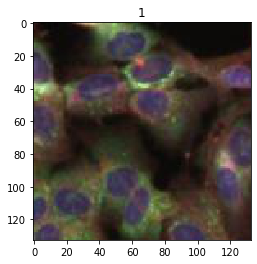

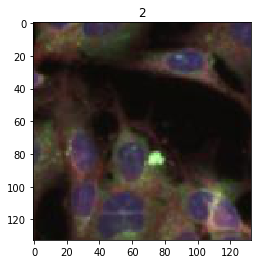

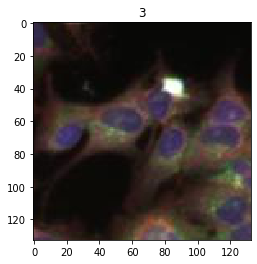

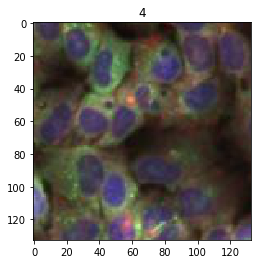

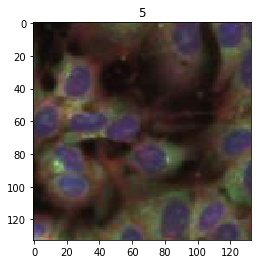

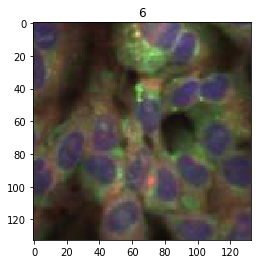

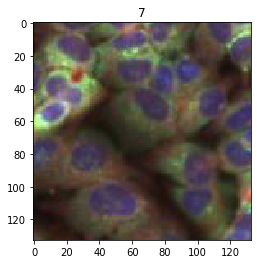

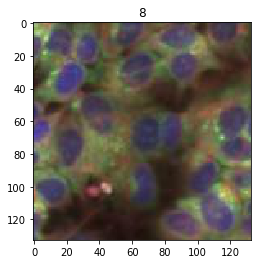

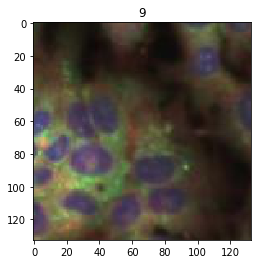

(<Tile #5 - HEPG2-08_1_B03_s2_02_02.png>, <Tile #4 - HEPG2-08_1_B03_s2_02_01.png>)


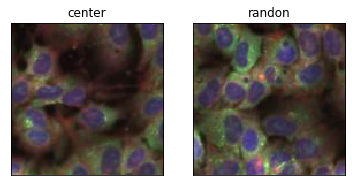

In [19]:
processing([image_files[1]])